In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

In [2]:
# make_structure_df - Функция создания пандас-таблицы, описывающей структуру данных 
# Параметры:
# make_col_df - создать таблицу (True) или просто вывести на печать краткую структуру данных (False)
# nan_count - показать количетсов пропущенных данных в столбце
# max_nuniques_for_print - максимальное количество уникальных значений для вывода в столбце "uniques"
# max_nuniques_as_categorial - максимальное количество уникальных значений в столбце, при котором тип столбца признаётся категориальным

def make_structure_df(data, make_col_df=True, nan_count=False, max_nuniques_for_print = 5, max_nuniques_as_categorial = 10):
    
    columns=['col_name', 'col_type', 'type', 'nunique', 'uniques', 'max_len']
    
    if make_col_df == True:
        cols = []
    for col_name in data.columns:
        
        col_nunique = data[col_name].nunique()
        ctype = data[col_name].dtype.name
        
        if make_col_df == True:
            if (ctype == 'object') or (col_nunique <= max_nuniques_as_categorial):
                col_type = "categorial"
            elif ctype == 'datetime64[ns]':
                col_type = "datatime"
            else:
                col_type = "numeric"
            
            col_uniques = "..."
            if col_nunique <= max_nuniques_for_print:
                col_uniques = data[col_name].unique()
            
            if ctype == 'object':
                max_len = max(data[col_name].str.len())
            else:
                max_len = len(str(max(data[col_name])))
            
            cols.append([col_name, col_type, ctype, col_nunique, col_uniques, max_len])
    
    structure_df = pd.DataFrame(cols, columns=columns)
        
    if nan_count == True:
        structure_df['nan_count'] = data.isnull().sum(axis=0).tolist()
    
    return structure_df

In [3]:
#df.to_pickle('df_py27_201101-201608.pkl')
#df = pd.read_pickle('df_201101-201608.pkl')
df = pd.read_pickle('df_py27_2011-2016.pkl')

In [4]:
df_structure = make_structure_df(df)
df_structure

,col_name,col_type,type,nunique,uniques,max_len
0,Kuupдev,datatime,datetime64[ns],2176,...,19.0
1,Operatsioon,categorial,object,21374,...,40.0
2,AltkontoD1,categorial,object,1015,...,50.0
3,AltkontoD2,categorial,object,21551,...,21.0
4,AltkontoK1,categorial,object,29913,...,100.0
5,AltkontoK2,categorial,object,7,...,20.0
6,AltkontoK3,categorial,object,6,...,42.0
7,Kogus,numeric,float64,889,...,7.0
8,Summa,numeric,float64,12722,...,8.0
9,Val,categorial,object,4,"[EUR, RUB, JPY, GBP]",3.0


In [16]:
df

,Kuupдev,AltkontoD1,AltkontoD2,AltkontoK1,AltkontoK2,AltkontoK3,Kogus,Summa,Val,SumVal,D1kod,D1regnr,D1tyyp,D1riik,D1GlubKredita,D1VAT,D1discont,D1Hinnad,K1kod,Код,Наименование,Розн_Цена,Опт_Цена,Прих_Цена,БазоваяЕдиница,ВалютаПрод,ВалютаЗакуп,Минимум,СтавкаНСО,Производитель,ШтрихКод,Страна,Поставщик,Емкость,Вес,КолВУпаковке,ВесУпаковки,ПродЦенаСНСО,Шифр,БезПартий,EKN,Цена2,Цена2СНСО,NameVene,NameEng,ISSA,LaduKoht,ДатаПослПрихода,НеУчитыватьВПрайс,Selgitus,SelgitusEng,SelgitusVene,FotoName,FotoName2,FotoName3,GUID,ID,КраткоеНаименование,АдресХраненияНаСкладе,ДатаИзменений,DocType,DocNum,DocNum2,DocDate2,Year,Month,Day,Weekday
0,2011-01-02,Rock-Al-Mare kauplus,Ast-000006 (02.01.11),Pardo pika varrega pдrlinхel 6tk,"Rocaalmaare, Tallinn",Pхhikдibe 18 -20 %,1.0,2.13,EUR,2.13,520/932,,Eraisik,Estonia,0,1,0,,42/16/930200100,930200100,Pardo pika varrega pдrlinхel 6tk,0.00,0.0,0.979,tk,EEK,EUR,0,18 - 20 %,Viva Decor Gmbh,4042972620011,Saksamaa,Viva Decor Gmbh,0.0,0.02,3,0.0,0.0,V930200100,1,82055980,2.130,2.557,Комплект спиц для бусин Pardo 6шт,Pardo Pins 6pcs,,,. .,0,95,117,146,V930200100.bmp,V930200100-1.bmp,,973A2654-0DA7-4173-A3DD-9ED723945DE4,4515,Pardo pika varrega pдrlinхel 6tk,,. .,Arve/saateleht,Ast-000006,Ast-000006,02.01.11,2011,1,2,6
1,2011-01-02,Rock-Al-Mare kauplus,Ast-000006 (02.01.11),Must,"Rocaalmaare, Tallinn",Pхhikдibe 18 -20 %,2.0,2.77,EUR,2.77,520/932,,Eraisik,Estonia,0,1,0,,62/2300000/222/2/47811,47811,Must,0.00,0.0,0.000,tk,EEK,EEK,0,18 - 20 %,C.Kreul,4000798478117,Saksamaa,C.Kreul,0.0,0.02,6,0.0,0.0,47811,1,96082000,1.380,1.662,Черный,Black,,,. .,0,1,1,1,47811.bmp,47811.bmp,47811.bmp,E152C035-7AF6-41CB-B227-162C076A5127,4680,Must,1-I2-2-3,. .,Arve/saateleht,Ast-000006,Ast-000006,02.01.11,2011,1,2,6
2,2011-01-02,Rock-Al-Mare kauplus,Ast-000006 (02.01.11),"Kaadmium kollane, keskmine","Rocaalmaare, Tallinn",Pхhikдibe 18 -20 %,1.0,1.70,EUR,1.70,520/932,,Eraisik,Estonia,0,1,0,,62/800000/2604201,2604201,"Kaadmium kollane, keskmine",23.73,0.0,0.830,tk,EEK,EUR,60,18 - 20 %,"ZAO ""ZKH Nevskaja Palitra""",4607010586591,Venemaa,"ZAO ""ZKH Nevskaja Palitra""",0.0,0.10,4,0.0,28.0,2604201,1,32131000,1.960,2.350,Кадмий желтый средний,Cadmium Yellow Medium,,,. .,0,1,1,1,2604201.bmp,2604201.bmp,2604201.bmp,056A481C-5998-4D9E-AFA1-7C1E820E5B3B,158,"Kaadmium kollane, keskmine",1-B1-4-1,. .,Arve/saateleht,Ast-000006,Ast-000006,02.01.11,2011,1,2,6
3,2011-01-02,Rock-Al-Mare kauplus,Ast-000006 (02.01.11),Kutsikad,"Rocaalmaare, Tallinn",Pхhikдibe 18 -20 %,1.0,3.20,EUR,3.20,520/932,,Eraisik,Estonia,0,1,0,,62/2500000/11/94000/940000500,940000500,Kutsikad,0.00,0.0,0.000,tk,EEK,EEK,0,18 - 20 %,Viva Decor Gmbh,4042972600631,Saksamaa,Viva Decor Gmbh,0.0,0.00,3,0.0,0.0,V940000500,1,32139000,3.200,3.835,Щенки,Puppies,,,. .,0,1,1,1,V940000500.bmp,,,327ECD6C-4A88-4838-AD28-15B9AAA16AAD,5467,Kutsikad,,. .,Arve/saateleht,Ast-000006,Ast-000006,02.01.11,2011,1,2,6
4,2011-01-02,Rock-Al-Mare kauplus,Ast-000006 (02.01.11),Hхbe,"Rocaalmaare, Tallinn",Pхhikдibe 18 -20 %,1.0,2.56,EUR,2.56,520/932,,Eraisik,Estonia,0,1,0,,27/100/0/47421,47421,Hхbe,0.00,0.0,1.260,tk,EEK,EUR,0,18 - 20 %,C.Kreul,4000798474218,Saksamaa,C.Kreul,0.0,0.02,6,0.0,0.0,47421,1,96082000,2.560,3.068,Серебрянный,Silver,,,. .,0,1,1,1,47421.bmp,47421.bmp,47421.bmp,31B750A5-E97E-445F-9E93-5C5A791A0150,4652,Hхbe,1-I2-2-3,. .,Arve/saateleht,Ast-000006,Ast-000006,02.01.11,2011,1,2,6
5,2011-01-02,Rock-Al-Mare kauplus,Ast-000006 (02.01.11),Hхbe,"Rocaalmaare, Tallinn",Pхhikдibe 18 -20 %,1.0,2.45,EUR,2.45,520/932,,Eraisik,Estonia,0,1,0,,27/100/2/47221,47221,Hхbe,0.00,0.0,1.148,tk,EEK,EUR,0,18 - 20 %,C.Kreul,4000798472214,Saksamaa,C.Kreul,0.0,0.02,6,0.0,0.0,47221,1,96082000,2.450,2.940,Серебрянный,Silver,,,. .,0,1,1,1,47221.bmp,47221.bmp,47221.bmp,C2E9A3CA-AB4B-4D54-9FED-6847C6AF302B,4643,Hхbe,1-I2-2-3,. .,Arve/saateleht,Ast-000006,Ast-000006,02.01.11,2011,1,2,6
6,2011-01-02,Rock-Al-Mare kauplus,Ast-000006 (02.01.11),Kuld,"Rocaalmaare, Tallinn",Pхhikдibe 18 -20 %,1.0,2.56,EUR,2.56,520/932,,Eraisi

## Чистим базу от явных повторений

In [9]:
del df.Operatsioon.str[:8]))

array([u'Arve/saa', u'Sissetul'], 
      dtype='<U8')

In [11]:
df.DocType.unique()

array([u'Arve/saateleht', u'Sissetulek'], dtype=object)

In [12]:
del(df['Operatsioon'])

In [17]:
del(df['DocDate2'])

In [25]:
df[df[u'DocNum'] != df['DocNum2']]

,Kuupдev,AltkontoD1,AltkontoD2,AltkontoK1,AltkontoK2,AltkontoK3,Kogus,Summa,Val,SumVal,D1kod,D1regnr,D1tyyp,D1riik,D1GlubKredita,D1VAT,D1discont,D1Hinnad,K1kod,Код,Наименование,Розн_Цена,Опт_Цена,Прих_Цена,БазоваяЕдиница,ВалютаПрод,ВалютаЗакуп,Минимум,СтавкаНСО,Производитель,ШтрихКод,Страна,Поставщик,Емкость,Вес,КолВУпаковке,ВесУпаковки,ПродЦенаСНСО,Шифр,БезПартий,EKN,Цена2,Цена2СНСО,NameVene,NameEng,ISSA,LaduKoht,ДатаПослПрихода,НеУчитыватьВПрайс,Selgitus,SelgitusEng,SelgitusVene,FotoName,FotoName2,FotoName3,GUID,ID,КраткоеНаименование,АдресХраненияНаСкладе,ДатаИзменений,DocType,DocNum,DocNum2,Year,Month,Day,Weekday
15620,2011-03-16,Kunstistuudio OЬ,0000001 (16.03.11),Nr.0,"Pealadu, Tallinn",Pхhikдibe 18 -20 %,-5.0,-3.20,EUR,-3.20,517/1047/556,10492569,Firma,Estonia,0,0,30,H1,16/10/1410/14100080,14100080,Nr.0,0.00,0.0,42.160,tk,EEK,RUB,0,18 - 20 %,"OOO ""Zhivopysny Kisti""",4607069787031,Venemaa,"OOO ""Zhivopysny Kisti""",0.0,0.01,10,0.0,0.0,R1410-0,1,96033010,1.180,1.420,Nr.0,Nr.0,,,. .,0,1,1,1,,,,BA284DD5-22A0-4FFC-BFBD-9826B580CD98,3204,Nr.0,2-T2-1-2,. .,Sissetulek,(tagastamine ostjalt) 0000001,0000001,2011,3,16,2
33749,2011-06-17,Ehitus Service OЬ,0000003 (17.06.11),"Mini рabloon 13x40cm 057, mitmekordne","Pealadu, Tallinn",Pхhikдibe 18 -20 %,-2.0,-4.76,EUR,-4.76,517/1047/759,10636638,Firma,Estonia,0,1,0,,62/2300000/900207562/57,57,"Mini рabloon 13x40cm 057, mitmekordne",0.00,0.0,0.000,tk,EEK,EEK,0,18 - 20 %,BRICOMOLDUR S.L.,8427119000578,Spain,BRICOMOLDUR S.L.,0.0,0.05,0,0.0,0.0,B057,1,39199000,3.300,3.963,"Мини шаблон 13х40, многоразовый","Ministencils med./size 13x40cm, reusable",,,. .,0,1,1,1,B057.bmp,,,8FB0F173-CE85-49FA-B735-35E65CDEC31E,4982,"Mini рabloon 13x40cm 057, mitmekordne",,. .,Sissetulek,(tagastamine ostjalt) 0000003,0000003,2011,6,17,4
33750,2011-06-17,Ehitus Service OЬ,0000003 (17.06.11),"Mini рabloon 70x11cm 528, mitmekordne","Pealadu, Tallinn",Pхhikдibe 18 -20 %,-2.0,-7.66,EUR,-7.66,517/1047/759,10636638,Firma,Estonia,0,1,0,,62/2300000/900207562/528,528,"Mini рabloon 70x11cm 528, mitmekordne",0.00,0.0,0.000,tk,EEK,EEK,0,18 - 20 %,BRICOMOLDUR S.L.,8427119005283,Spain,BRICOMOLDUR S.L.,0.0,0.05,2,0.0,0.0,B528,1,39199000,5.330,6.391,"Мини шаблон 70х11, многоразовый","Ministencils med./size 70x11cm, reusable",,,. .,0,1,1,1,B528.bmp,,,1D66E35D-82E1-4957-BF14-C088ECE86C1F,5038,"Mini рabloon 70x11cm 528, mitmekordne",2-Z,. .,Sissetulek,(tagastamine ostjalt) 0000003,0000003,2011,6,17,4
33751,2011-06-17,Ehitus Service OЬ,0000003 (17.06.11),"Mini рabloon 18x50cm 420, mitmekordne","Pealadu, Tallinn",Pхhikдibe 18 -20 %,-1.0,-3.83,EUR,-3.83,517/1047/759,10636638,Firma,Estonia,0,1,0,,62/2300000/900207562/420,420,"Mini рabloon 18x50cm 420, mitmekordne",0.00,0.0,0.000,tk,EEK,EEK,0,18 - 20 %,BRICOMOLDUR S.L.,8427119004200,Spain,BRICOMOLDUR S.L.,0.0,0.05,2,0.0,0.0,B420,1,39199000,5.330,6.391,"Мини шаблон 18х50, многоразовый","Ministencils med./size 18x50cm, reusable",,,. .,0,1,1,1,B420.bmp,,,359026AA-986A-4A9C-A323-192A592A2E15,5004,"Mini рabloon 18x50cm 420, mitmekordne",2-Z,. .,Sissetulek,(tagastamine ostjalt) 0000003,0000003,2011,6,17,4
33752,2011-06-17,Ehitus Service OЬ,0000003 (17.06.11),"Maxi рabloon B6000, mitmekordne","Pealadu, Tallinn",Pхhikдibe 18 -20 %,-2.0,-33.68,EUR,-33.68,517/1047/759,10636638,Firma,Estonia,0,1,0,,62/2300000/900207562/6000,6000,"Maxi рabloon B6000, mitmekordne",0.00,0.0,0.000,tk,EEK,EEK,0,18 - 20 %,BRICOMOLDUR S.L.,8427119060008,Spain,BRICOMOLDUR S.L.,0.0,0.05,0,0.0,0.0,B6000,1,39199000,25.140,30.166,"Макси шаблон, многоразовый","Stencil med. B6000,reusable",,,. .,0,42,36,268,B6000.bmp,,,5138A4D8-FD5C-4353-9E78-34C76C86CAA3,5121,"Maxi рabloon B6000, mitmekordne",,. .,Sissetulek,(tagastamine ostjalt) 0000003,0000003,2011,6,17,4
33753,2011-06-17,Ehitus Service OЬ,0000003 (17.06.11),"Maxi рabloon B6017, mitmekordne","Pealadu, Tallinn",Pхhikдibe 18 -20 %,-2.0,-33.68,EUR,-33.68,517/1047/759,10636638,Firma,Estonia,0,1,0,,62/2300000/900207562/6017,6017,"Maxi рabloon B6017, mitmekordne",0.00,0.0,0.

In [26]:
del(df[u'DocNum'])
del(df[u'ДатаИзменений'])
del(df['GUID'])

In [37]:
df.LaduKoht.value_counts()

           1319663
1I2-1-2        740
1I2-2-4        145
1I2-1-4        111
Name: LaduKoht, dtype: int64

In [48]:
print 'Количество товаров, признак _НеУчитыватьВПрайс_ для которых = 1 : %i штук' %df[df[u'НеУчитыватьВПрайс']==1]['ID'].nunique()
#del(df[u'НеУчитыватьВПрайс'])

Количество товаров, признак _НеУчитыватьВПрайс_ для которых = 1 : 3 штук


In [51]:
df[u'ДатаПослПрихода'].nunique()

4

In [52]:
del(df[u'ДатаПослПрихода'])

In [59]:
print df[u'ISSA'].unique()
print df[df[u'ISSA']=='285']['ID'].nunique()
del(df[u'ISSA'])

[u' ' u'285']
1


In [63]:
df[u'Емкость'].value_counts()

0.00     1316763
0.46        2945
46.00        951
Name: Емкость, dtype: int64

In [64]:
del(df['AltkontoD2'])

In [65]:
df[df['Summa'] != df['SumVal']]

,Kuupдev,AltkontoD1,AltkontoK1,AltkontoK2,AltkontoK3,Kogus,Summa,Val,SumVal,D1kod,D1regnr,D1tyyp,D1riik,D1GlubKredita,D1VAT,D1discont,D1Hinnad,K1kod,Код,Наименование,Розн_Цена,Опт_Цена,Прих_Цена,БазоваяЕдиница,ВалютаПрод,ВалютаЗакуп,Минимум,СтавкаНСО,Производитель,ШтрихКод,Страна,Поставщик,Емкость,Вес,КолВУпаковке,ВесУпаковки,ПродЦенаСНСО,Шифр,БезПартий,EKN,Цена2,Цена2СНСО,NameVene,NameEng,LaduKoht,НеУчитыватьВПрайс,Selgitus,SelgitusEng,SelgitusVene,FotoName,FotoName2,FotoName3,ID,КраткоеНаименование,АдресХраненияНаСкладе,DocType,DocNum2,Year,Month,Day,Weekday
3838,2011-01-25,Kalifeks SIA,Tsinkvalge,"Pealadu, Tallinn",Kaubakдibe Ьhendusesisene 0 %,40.0,34.63,RUB,1393.20,880/674/566,LV40003164771,Firma,Lati,0,1,0,,2/1/1/2204100,2204100,Tsinkvalge,22.03,24.0,0.68,tk,EEK,EUR,120,18 - 20 %,"ZAO ""ZKH Nevskaja Palitra""",4607010582708,Venemaa,"ZAO ""ZKH Nevskaja Palitra""",0.00,0.08,4,0.0,26.0,2204100,0,32139000,1.630,1.960,Белила цинковые,Zinc White,,0,1,1,1,2204100.bmp,,,391,Tsinkvalge,1-A2-6-2,Arve/saateleht,Ast-000080,2011,1,25,1
3839,2011-01-25,Kalifeks SIA,Titaanvalge,"Pealadu, Tallinn",Kaubakдibe Ьhendusesisene 0 %,40.0,34.63,RUB,1393.20,880/674/566,LV40003164771,Firma,Lati,0,1,0,,2/1/1/2204101,2204101,Titaanvalge,22.03,24.0,0.68,tk,EEK,EUR,120,18 - 20 %,"ZAO ""ZKH Nevskaja Palitra""",4607010582913,Venemaa,"ZAO ""ZKH Nevskaja Palitra""",0.46,0.07,4,0.0,26.0,2204101,0,32139000,1.630,1.960,Белила титановые,Titanium White,,0,1,1,1,2204101.bmp,,,392,Titaanvalge,1-A2-6-2,Arve/saateleht,Ast-000080,2011,1,25,1
3840,2011-01-25,Kalifeks SIA,Tьrkiis,"Pealadu, Tallinn",Kaubakдibe Ьhendusesisene 0 %,20.0,17.32,RUB,696.60,880/674/566,LV40003164771,Firma,Lati,0,1,0,,2/1/1/2204507,2204507,Tьrkiis,22.03,25.0,0.68,tk,EEK,EUR,80,18 - 20 %,"ZAO ""ZKH Nevskaja Palitra""",4607010583033,Venemaa,"ZAO ""ZKH Nevskaja Palitra""",0.00,0.07,4,0.0,26.0,2204507,0,32139000,1.630,1.960,Бирюзовая,Turquoise Blue,,0,1,1,1,2204507.bmp,2204507.bmp,2204507.bmp,415,Tьrkiis,1-A2-6-4,Arve/saateleht,Ast-000080,2011,1,25,1
3841,2011-01-25,Kalifeks SIA,Sinine FC,"Pealadu, Tallinn",Kaubakдibe Ьhendusesisene 0 %,20.0,17.32,RUB,696.60,880/674/566,LV40003164771,Firma,Lati,0,1,0,,2/1/1/2204500,2204500,Sinine FC,22.03,25.0,0.68,tk,EEK,EUR,80,18 - 20 %,"ZAO ""ZKH Nevskaja Palitra""",4607010583019,Venemaa,"ZAO ""ZKH Nevskaja Palitra""",0.00,0.07,4,0.0,26.0,2204500,0,32139000,1.630,1.960,Голубая ФЦ,Phthalocyanine Blue,,0,1,1,1,2204500.bmp,2204500.bmp,2204500.bmp,413,Sinine FC,1-A2-6-4,Arve/saateleht,Ast-000080,2011,1,25,1
3842,2011-01-25,Kalifeks SIA,Kollane hele,"Pealadu, Tallinn",Kaubakдibe Ьhendusesisene 0 %,20.0,17.32,RUB,696.60,880/674/566,LV40003164771,Firma,Lati,0,1,0,,2/1/1/2204213,2204213,Kollane hele,22.03,25.0,0.68,tk,EEK,EUR,80,18 - 20 %,"ZAO ""ZKH Nevskaja Palitra""",4607010583057,Venemaa,"ZAO ""ZKH Nevskaja Palitra""",0.46,0.07,4,0.0,26.0,2204213,0,32139000,1.630,1.960,Желтая светлая,Yellow Light,,0,1,1,1,2204213.bmp,,,396,Kollane hele,1-A2-7-2,Arve/saateleht,Ast-000080,2011,1,25,1
3843,2011-01-25,Kalifeks SIA,"Kollane, keskmine","Pealadu, Tallinn",Kaubakдibe Ьhendusesisene 0 %,20.0,17.32,RUB,696.60,880/674/566,LV40003164771,Firma,Lati,0,1,0,,2/1/1/2204220,2204220,"Kollane, keskmine",22.03,25.0,0.68,tk,EEK,EUR,80,18 - 20 %,"ZAO ""ZKH Nevskaja Palitra""",4607010583064,Venemaa,"ZAO ""ZKH Nevskaja Palitra""",0.46,0.07,4,0.0,26.0,2204220,0,32139000,1.630,1.960,Желтая средняя,Yellow Medium,,0,1,1,1,2204220.bmp,,,398,"Kollane, keskmine",1-A2-6-3,Arve/saateleht,Ast-000080,2011,1,25,1
3844,2011-01-25,Kalifeks SIA,Kinaveer,"Pealadu, Tallinn",Kaubakдibe Ьhendusesisene 0 %,20.0,17.32,RUB,696.60,880/674/566,LV40003164771,Firma,Lati,0,1,0,,2/1/1/2204312,2204312,Kinaveer,22.03,25.0,0.68,tk,EEK,EUR,80,18 - 20 %,"ZAO ""ZKH Nevskaja Palitra""",4607010585211,Venemaa,"ZAO ""ZKH Nevskaja Palitra""",0.00,0.07,4,0.0,26.0,2204312,0,32139000,1.630,1.960,Киноварь,Vermilion (hue),,0,1,1,1,2204312.bmp,2204312.bmp,2204312.bmp,401,Kinaveer,1-A2-6-3,Arve/saateleht,Ast-000080,2011,1,25,1
3845,

In [70]:
df[df['Summa']==0].shape[0]

69

Признак D1kod составной - из кода группы, подгруппы (если есть) и кода товара в группе/подгруппе. В таком виде он равнозначен ID. Проверим и разделим по разным колонкам.

In [ ]:
%%time
lens=[]
for i in df['D1kod'].str.split('/').values:
    lens.append(len(i))

In [25]:
np.unique(lens)

array([2, 3])

In [75]:
df['D1kod'].str.split('/').values

array([[u'520', u'932'], [u'520', u'932'], [u'520', u'932'], ...,
       [u'520', u'1399'], [u'520', u'1399'], [u'520', u'1399']], dtype=object)

In [79]:
df[['D1kod1', 'D1kod2', 'D1kod3']] = df['D1kod'].str.split('/',expand=True)
#pd.DataFrame([ x.split() for x in df['D1kod'].tolist() ])

In [91]:
df.loc[df['D1kod3'].isnull(),'D1kod3']=df.loc[df['D1kod3'].isnull(),'D1kod2']

In [94]:
df.loc[df['D1kod2']==df['D1kod3'],'D1kod2']=0

In [95]:
del(df['D1kod'])

In [96]:
df.to_pickle('df_py27_2011-2016.pkl')
#df = pd.read_pickle('df_py27_2011-2016.pkl')

### Looking at data set

In [97]:
pivot_qty = pd.pivot_table(df[df['Year']>2013][df['D1tyyp']=='Eraisik'], values='Summa', index=[u'Kuupдev'],
                     columns=['AltkontoK2'], fill_value = 0, aggfunc=[np.sum])

C:\Users\User\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [98]:
pivot_qty.resample('D')

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

In [99]:
pivot_qty.head(5)

sum                                                      \
AltkontoK2 MIX, Tallinn Pealadu, Tallinn Raua, Tallinn Rocaalmaare, Tallinn   
Kuupдev                                                                       
2014-01-01         0.00            87.20          0.00                 0.00   
2014-01-02       259.71           351.09        158.27              1062.87   
2014-01-03       486.25            39.26        522.03              1143.73   
2014-01-04       203.35             0.00         40.27              1119.36   
2014-01-05         0.00             0.00          0.00              1132.43   

                         
AltkontoK2 Tasku, Tartu  
Kuupдev                  
2014-01-01         0.00  
2014-01-02       641.45  
2014-01-03       889.11  
2014-01-04       799.91  
2014-01-05       490.89

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000000AC605438>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000001180A93C8>], dtype=object)

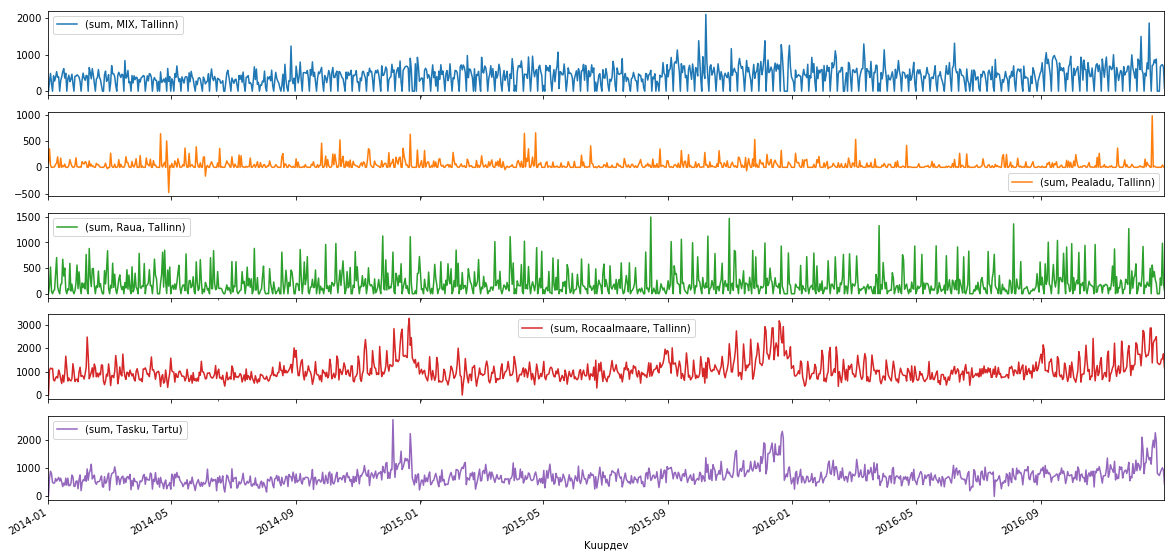

In [100]:
pivot_qty.plot(figsize=(20,10), subplots=True)

Два первых явно с выходными, остальные без. 
Вопросы к руководству компании:
    1. Какие значимые события были:
        - В октябре 2015 в Таллине, Микс.
        - В апреле 2015, главный склад
        - Декабрь 2015, Тарту.
    2. Были ли какие-либо существенные изменения в Рок-аль-Маре, начиная с конца октября 2015.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000011DF8A828>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000E07E4978>]], dtype=object)

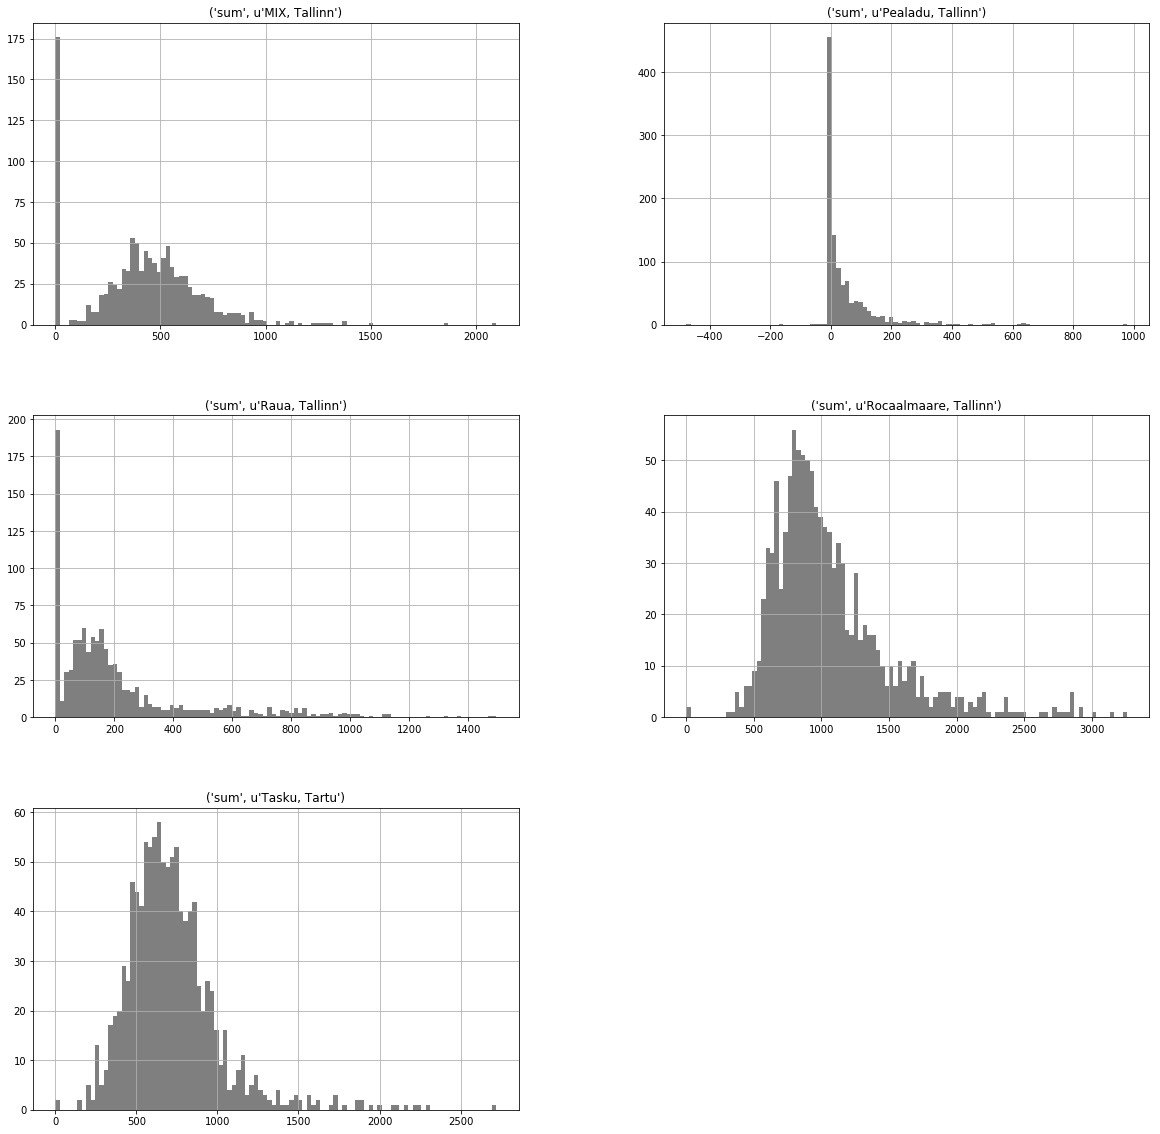

In [101]:
pivot_qty.hist(color='k', alpha=0.5, bins=100, figsize=(20,20))

<span style="color:red">Первые три магазина имеют нулевые продажи по воскресеньям</span>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000011FFF63C8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000122405F98>]], dtype=object)

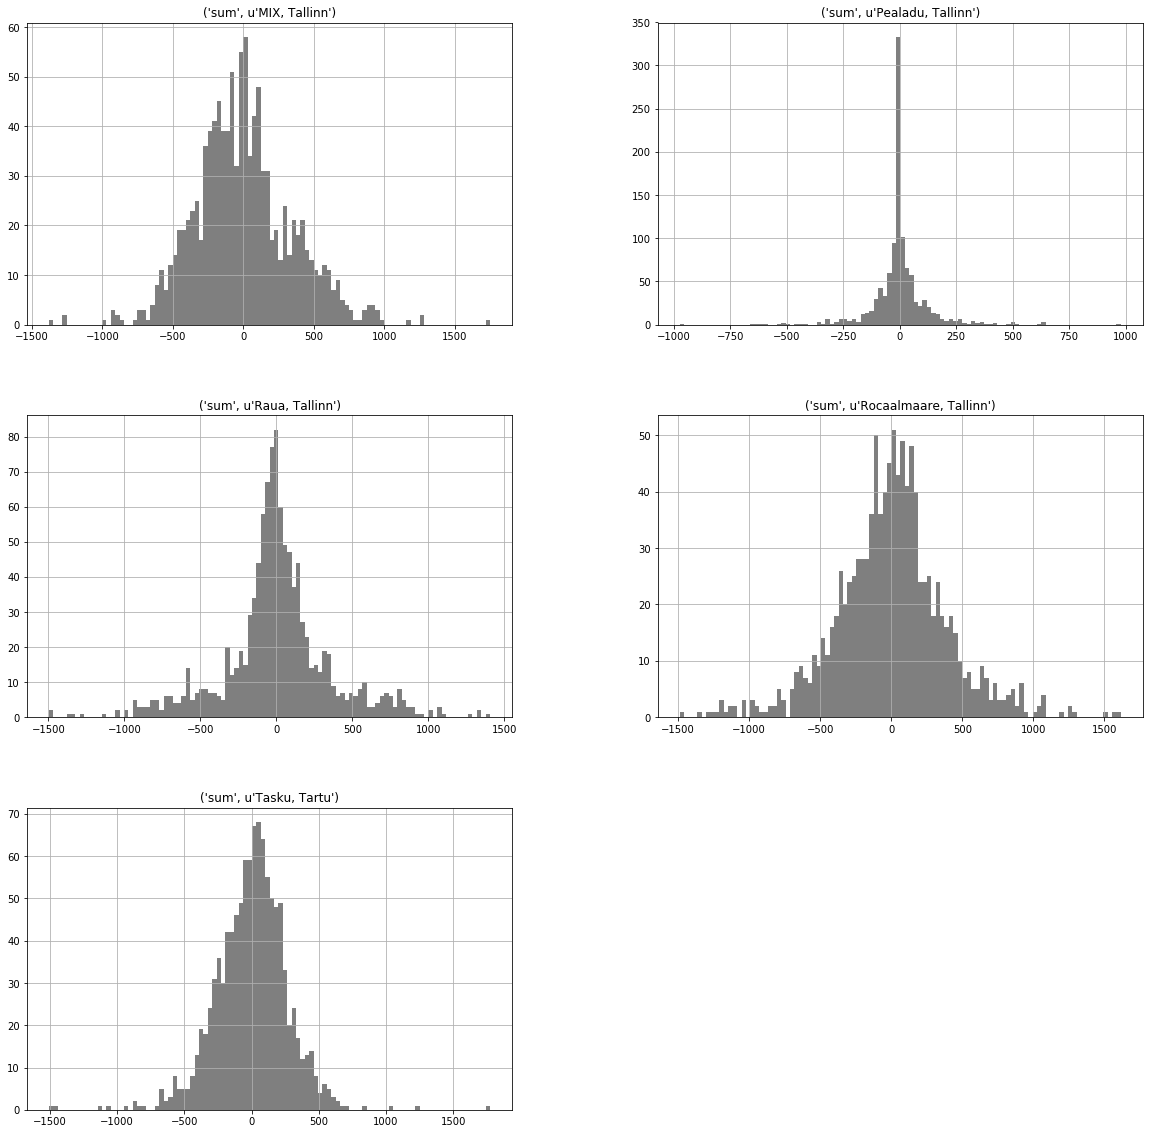

In [102]:
pivot_qty.diff().hist(color='k', alpha=0.5, bins=100, figsize=(20,20))

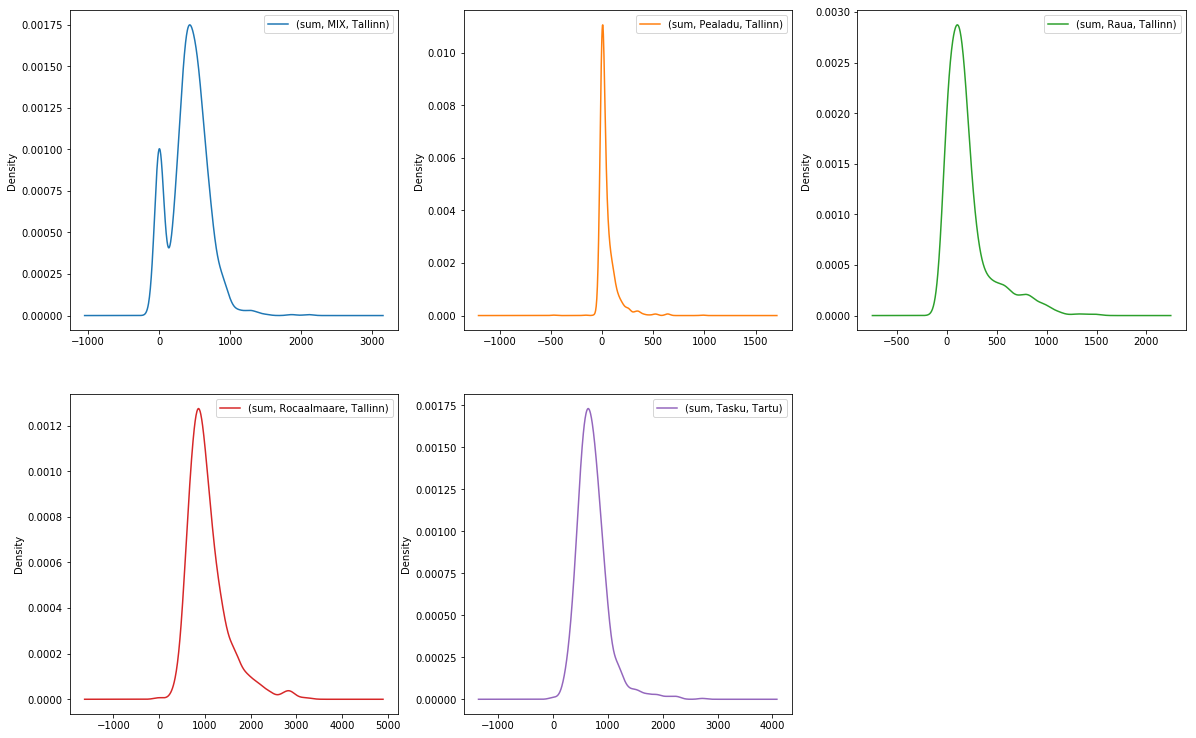

In [103]:
pivot_qty.plot(kind='density', subplots=True, layout=(3,3), sharex=False, figsize=(20,20))
plt.show()

Попробуем найти корреляцию между продажами разных товаров.

In [167]:
pivot_qty = pd.pivot_table(df[df['Year']==2015][df['D1tyyp']=='Eraisik'], values='Summa', index=[u'Kuupдev'],
                     columns=['ID'], fill_value = 0, aggfunc=[len])

C:\Users\User\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [168]:
pivot_qty.head(5)

len                                                              \
ID         3     4     5     6     7     8     9     10    11    12    13      
Kuupдev                                                                        
2015-01-02     1     1     1     0     0     0     0     0     2     0     0   
2015-01-03     1     0     0     0     1     1     1     0     1     0     0   
2015-01-04     0     0     0     0     0     0     0     0     0     0     0   
2015-01-05     1     0     0     0     0     0     0     0     0     1     0   
2015-01-06     0     0     1     0     1     0     0     0     0     0     0   

                                                                              \
ID         14    15    16    17    18    19    20    21    22    23    24      
Kuupдev                                                                        
2015-01-02     0     0     0     0     0     0     0     0     0     0     0   
2015-01-03     0     0     0     0     0     0     1     0     0     0     0   
2015-01-04     0     0     0     0     0     0     0     0     0     0     0   
2015-01-05     0     0     0     0     1     0     0     0     0     0     0   
2015-01-06     0     0     0     0     0     0     0     0     0     0     0   

                                                                              \
ID         25    26    27    28    29    30    31    32    33    34    35      
Kuupдev                                                                        
2015-01-02     0     0     0     0     0     0     0     0     0     0     0   
2015-01-03     0     0     0     0     0     0     0     0     0     0     0   
2015-01-04     0     0     0     0     0     0     0     0     0     0     0   
2015-01-05     0     0     1     0     0     0     0     0     0     0     0   
2015-01-06     0     0     1     0     0     0     0     0     0     0     2   

                                                                              \
ID         36    37    38    39    41    42    43    44    45    46    47      
Kuupдev                                                                        
2015-01-02     0     0     0     0     0     0     0     0     0     0     0   
2015-01-03     0     0     0     0     1     0     0     0     0     0     0   
2015-01-04     0     0     0     0     0     0     0     0     0     0     0   
2015-01-05     0     0     0     1     0     0     0     0     0     0     0   
2015-01-06     0     0     0     0     1     0     0     0     0     0     0   

                                                ...                           \
ID         48    49    50    51    52    54     ...  63489 63490 63491 63492   
Kuupдev                                         ...                            
2015-01-02     0     0     0     0     0     0  ...      0     0     0     0   
2015-01-03     0     0     1     0     0     0  ...      0     0     0     0   
2015-01-04     0     0     1     0     0     0  ...      0     0     0     0   
2015-01-05     0     0     0     0     0     0  ...      0     0     0     0   
2015-01-06     0     0     0     0     0     0  ...      0     0     0     0   

                                                                              \
ID         63493 63494 63513 63514 63515 63531 63532 63536 63537 63538 63539   
Kuupдev                                                                        
2015-01-02     0     0     0     0     0     0     0     0     0     0     0   
2015-01-03     0     0     0     0     0     0     0     0     0     0     0   
2015-01-04     0     0     0     0     0     0     0     0     0     0     0   
2015-01-05     0     0     0     0     0     0     0     0     0     0     0   
2015-01-06     0     0     0     0     0     0     0     0     0     0     0   

                                                                              \
ID         63540 63545 63546 63547 63548 63549 63550 63551 63552 63568 63571   
Kuupдev

In [148]:
pivot_qty.index

DatetimeIndex(['2015-01-02', '2015-01-03', '2015-01-04', '2015-01-05',
               '2015-01-06', '2015-01-07', '2015-01-08', '2015-01-09',
               '2015-01-10', '2015-01-11',
               ...
               '2015-12-21', '2015-12-22', '2015-12-23', '2015-12-24',
               '2015-12-26', '2015-12-27', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', name=u'Kuupдev', length=362, freq=None)

In [147]:
columns = list(pivot_qty.columns.levels[1])

In [169]:
df_2015_ids = pd.DataFrame(index = pivot_qty.index, columns=[3,4,5])
for i, col in enumerate(columns):
    df_2015_ids[col] = pivot_qty.ix[:,i]

In [170]:
df_2015_ids.head(5)

,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,41,42,43,44,45,46,47,48,49,50,51,52,54,...,63489,63490,63491,63492,63493,63494,63513,63514,63515,63531,63532,63536,63537,63538,63539,63540,63545,63546,63547,63548,63549,63550,63551,63552,63568,63571,63572,63573,63677,63679,63681,63684,63685,63686,63687,63688,63689,63690,63692,63708,63709,63710,63711,63712,63713,63714,63715,63716,63717,63718
Kuupдev,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-02,1,1,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2015-01-03,1,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2015-01-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2015-01-05,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2015-01-06,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [171]:
(df_2015_ids[df_2015_ids > 0].count() > 50).values

array([ True,  True,  True, ..., False, False, False], dtype=bool)

In [172]:
df_2015_ids.loc[:,(df_2015_ids[df_2015_ids > 0].count() > 50).values]

,3,4,5,6,8,11,27,28,42,46,62,63,73,74,75,76,78,87,88,92,100,103,110,111,114,124,128,129,155,156,161,258,315,377,378,379,391,392,393,394,396,397,398,401,403,404,405,407,408,409,...,56061,56062,56063,56064,56065,56066,56182,56183,56196,56329,56330,56334,56490,56517,56518,56807,56808,56810,56854,56855,56857,56942,57352,57353,57394,57403,58080,58561,58562,58563,58650,59199,59455,59456,59458,59459,59460,59461,59462,59463,59464,59465,59467,59473,59483,59513,59517,60067,60069,60070
Kuupдev,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-02,1,1,1,0,0,2,0,0,0,0,0,0,2,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,2,1,0,0,1,1,0,0,0,0,2,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2015-01-03,1,0,0,0,1,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2015-01-04,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2015-01-05,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,2,1,0,0,0,1,0,1,0,1,0,0,0,...,0,1,0,1,1,1,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2015-01-06,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,2,...,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2015-01-07,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2015-01-08,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,2,1,1,1,0,0,1,0,0,1,1,2,0,1,0,0,0,0,0,0,1,1,0,0,...,0,1,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2015-01-09,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,2,1,0,0,0,0,1,1,0,0,0,0,0,0,...,0,0,0,1,1,1,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2015-01-10,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,3,0,0,1,0,0,0,0,0,1,1,1,1,0,2,1,2,1,0,1,0,0,1,...,0,0,0,1,0,0,0,1,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [173]:
pivot_qty_corr = df_2015_ids.loc[:,df_2015_ids[df_2015_ids > 0].count().values > 50].corr() #method='spearman'

In [174]:
pivot_qty_corr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 804 entries, 3 to 60070
Columns: 804 entries, 3 to 60070
dtypes: float64(804)
memory usage: 4.9 MB


In [175]:
pivot_qty_corr.to_pickle('pivot_inv-count_count-more50_corr.pkl')
#pivot_qty_corr = pd.read_pickle('pivot_inv-qty_count-more120_corr.pkl')

In [176]:
abs(pivot_qty_corr).head(5)

,3,4,5,6,8,11,27,28,42,46,62,63,73,74,75,76,78,87,88,92,100,103,110,111,114,124,128,129,155,156,161,258,315,377,378,379,391,392,393,394,396,397,398,401,403,404,405,407,408,409,...,56061,56062,56063,56064,56065,56066,56182,56183,56196,56329,56330,56334,56490,56517,56518,56807,56808,56810,56854,56855,56857,56942,57352,57353,57394,57403,58080,58561,58562,58563,58650,59199,59455,59456,59458,59459,59460,59461,59462,59463,59464,59465,59467,59473,59483,59513,59517,60067,60069,60070
3,1.000000,0.085820,0.000818,0.153585,0.127543,0.182177,0.048583,0.040059,0.044991,0.109290,0.129623,0.015836,0.165969,0.013106,0.015418,0.071992,0.054461,0.073570,0.067634,0.000607,0.016116,0.087969,0.049014,0.045654,0.040277,0.007300,0.035049,0.059155,0.061672,0.043020,0.000898,0.050684,0.027488,0.019600,0.007513,0.015241,0.160050,0.133051,0.018238,0.035935,0.095241,0.082916,0.084280,0.007679,0.036369,0.011652,0.045874,0.017636,0.047499,0.022974,...,0.071999,0.015840,0.027769,0.012968,0.153207,0.061994,0.132230,0.017575,0.137197,0.019893,0.079848,0.084182,0.035915,0.035239,0.045450,0.019894,0.068771,0.025942,0.088241,0.112214,0.009852,0.003261,0.024049,0.000027,0.025072,0.016068,0.028196,0.009040,0.033615,0.016385,0.009467,0.093986,0.048967,0.100274,0.012396,0.045117,0.013969,0.116826,0.012265,0.093282,0.059618,0.077335,0.063644,0.079233,0.083550,0.065313,0.012403,0.018475,0.056400,0.086986
4,0.085820,1.000000,0.046455,0.041215,0.024601,0.067520,0.100118,0.041527,0.131092,0.072996,0.063030,0.001313,0.004611,0.001103,0.039715,0.107211,0.027352,0.014365,0.043549,0.037452,0.052253,0.015399,0.010341,0.012319,0.089077,0.080041,0.023324,0.015808,0.085726,0.016612,0.017277,0.001908,0.014039,0.014924,0.059386,0.061456,0.014202,0.003020,0.034390,0.050014,0.010640,0.097488,0.066322,0.060908,0.005345,0.001198,0.063268,0.027921,0.022893,0.052820,...,0.003244,0.003281,0.023305,0.013322,0.026311,0.029695,0.041686,0.089647,0.052555,0.082047,0.032036,0.073954,0.072687,0.039627,0.035180,0.048790,0.010362,0.003356,0.056863,0.045610,0.027745,0.052966,0.117940,0.019739,0.064402,0.088756,0.031708,0.002245,0.029796,0.075699,0.020881,0.033257,0.013371,0.009047,0.069442,0.056562,0.025337,0.055381,0.043965,0.073700,0.062952,0.047978,0.005306,0.048399,0.087634,0.124490,0.013899,0.001611,0.009498,0.054513
5,0.000818,0.046455,1.000000,0.063107,0.045321,0.103892,0.163413,0.137179,0.078339,0.130659,0.032561,0.058012,0.014910,0.066834,0.092673,0.053861,0.024735,0.046781,0.109060,0.067531,0.062986,0.032274,0.037765,0.034441,0.012791,0.075744,0.143313,0.057730,0.104316,0.013336,0.042877,0.096326,0.064725,0.065223,0.069694,0.017841,0.023052,0.046093,0.000494,0.029904,0.029887,0.035915,0.020234,0.033712,0.059213,0.053861,0.004410,0.003377,0.028617,0.011806,...,0.004905,0.050703,0.090720,0.003723,0.078265,0.017250,0.066125,0.057334,0.046342,0.045211,0.045133,0.035508,0.038863,0.051167,0.006722,0.062734,0.058852,0.012257,0.022457,0.084992,0.017722,0.024412,0.019197,0.022799,0.004905,0.021855,0.033911,0.074442,0.024336,0.030306,0.022340,0.056468,0.047405,0.074928,0.049316,0.027111,0.031240,0.055114,0.013237,0.003403,0.082768,0.028989,0.086905,0.035054,0.002920,0.019405,0.078232,0.026676,0.009526,0.024568
6,0.153585,0.041215,0.063107,1.000000,0.286507,0.145838,0.080269,0.216004,0.232571,0.047510,0.163952,0.038851,0.023810,0.039299,0.052885,0.036608,0.048833,0.027393,0.077399,0.037120,0.039538,0.060469,0.064016,0.116655,0.047491,0.051633,0.044057,0.116956,0.050705,0.023220,0.027896,0.101106,0.084387,0.023009,0.012550,0.007179,0.163043,0.085688,0.032558,0.144600,0.116573,0.191191,0.007209,0.138545,0.048050,0.091368,0.075543,0.052195,0.054861,0.018931,...,0.024987,0.031351,0.017709,0.034264,0.030148,0.066116,0.021658,0.050236,0.070009,0.045953,0.013168,0.043523,0.039456,0.020589,0.065296,0.064019,0.000096,0.102567,0.004201,0.016680,0.032361,0.099084,0.023613,0.090886,0.030620,0.036557,0.057888,0.004698,0.029216,0.009029,0.047959,0.072531,0.065729,0.055432,0.068091,0.061049,0.090477,0.072500,0.06

In [183]:
min_level = 0.5
best_corrs = pd.DataFrame(columns=['ID0','ID','corr_abs','corr'])
for i in pivot_qty_corr.columns:
    y = abs(pivot_qty_corr.loc[pivot_qty_corr.index[pivot_qty_corr.index !=i],i]).sort_values(ascending=False)
    if abs(y.values[0] > min_level):
        dx = pd.DataFrame(columns=['ID0','ID','corr_abs','corr'])
        dx['ID'] = y[y>min_level].index.values
        dx['ID0'] = i
        dx['corr_abs'] = y[y>min_level].values
        dx['corr'] = pivot_qty_corr.loc[dx['ID'].values,i].values
        best_corrs = best_corrs.append(dx, ignore_index=True)
        #print(i)
        #print(abs(pivot_qty_corr.loc[pivot_qty_corr.index[pivot_qty_corr.index !=i],i]).sort_values(ascending=False)[:5])
best_corrs['ID0'] = best_corrs['ID0'].astype('int')
best_corrs['ID'] = best_corrs['ID'].astype('int')

In [184]:
best_corrs

,ID0,ID,corr_abs,corr
0,12266,56001,0.559640,0.559640
1,14368,14369,0.503864,0.503864
2,14369,14368,0.503864,0.503864
3,29586,29587,0.621354,0.621354
4,29587,29586,0.621354,0.621354
5,56001,12266,0.559640,0.559640
6,60069,60070,0.500670,0.500670
7,60070,60069,0.500670,0.500670


Вывод. Такой способ не эффективен на имеющихся данных. К сожалению, розничные продажи в представленных данных не разбиты на разные чеки, поэтому применять алгоритм "Aproiri" тоже нет смысла.

In [35]:
pivot_df.columns

MultiIndex(levels=[['sum', 'len'], ['Summa', 'Kogus'], ['Galerii MIX , Tallinn', 'Pealadu Tallinn', 'Raua 1 Tallinn', 'Rocaalmaare Tallinn', 'Tartu, Tasku']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1], [0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4]],
           names=[None, None, 'AltkontoK2'])

In [60]:
pd.concat(objs=[pivot_df.ix[:,('sum','Summa','Galerii MIX , Tallinn')], pivot_df.ix[:,('sum','Kogus','Galerii MIX , Tallinn')], pivot_df.ix[:,('len','Summa','Galerii MIX , Tallinn')]], axis=1)

sum                                         len
                           Summa                 Kogus                 Summa
           Galerii MIX , Tallinn Galerii MIX , Tallinn Galerii MIX , Tallinn
Kuupдev                                                                     
2015-01-02                361.05                153.00                   113
2015-01-03                352.95                 81.00                    60
2015-01-04                  0.00                  0.00                     0
2015-01-05                569.61                242.00                   158
2015-01-06                628.28                192.00                   129
2015-01-07                569.08                163.20                   132
2015-01-08                354.16                173.00                   117
2015-01-09                453.17                189.53                   110
2015-01-10                379.55                208.00                   115
2015-01-11                  0.00                  0.00                     0
2015-01-12                433.22                199.00                   107
2015-01-13                720.75                262.00                   186
2015-01-14                367.27                160.00                   114
2015-01-15                532.83                351.00                   184
2015-01-16                139.76                 70.00                    59
2015-01-17                400.39                196.00                   135
2015-01-18                  0.00                  0.00                     0
2015-01-19                548.62                298.00                   162
2015-01-20                322.84                127.00                   103
2015-01-21                724.02                240.00                   125
2015-01-22                460.13                251.00                   143
2015-01-23                551.94                210.00                   135
2015-01-24                331.10                140.00                   108
2015-01-25                  0.00                  0.00                     0
2015-01-26                479.84                270.50                   175
2015-01-27                563.04                241.00                   127
2015-01-28                288.95                186.00                   118
2015-01-29                384.79                245.00                   129
2015-01-30                748.59                288.30                   191
2015-01-31                344.64                171.20                   108
2015-02-01                  0.00                  0.00                     0
2015-02-02                368.20                218.00                   148
2015-02-03                338.08                180.68                   129
2015-02-04                568.15                288.54                   172
2015-02-05                561.03                290.58                   175
2015-02-06                513.79                219.00                   161
2015-02-07                277.45                132.00                    97
2015-02-08                  0.00                  0.00                     0
2015-02-09                666.11                367.00                   238
2015-02-10                718.08                413.65                   232
2015-02-11                582.59                323.00                   192
2015-02-12                716.20                385.15                   204
2015-02-13                654.83                367.22                   197
2015-02-14                503.04                190.65                   121
2015-02-15                  0.00                  0.00                     0
2015-02-16                975.97                312.20                   182
2015-02-17                368.98                276.00                   116
2015-02-18                609.34                259.70                   159
2015-02-19               

In [186]:
print(df.D1kod.str.count('/').min())
print(df.D1kod.str.count('/').max())
print(df.K1kod.str.count('/').min())
print(df.K1kod.str.count('/').max())

1
2
1
5


In [110]:
#fig = plt.gcf()
#fig.set_size_inches(18.5, 10.5)
#fig.savefig('test2png.png', dpi=100)
#plt.figure(figsize=(20,10))
df_pivot_summa = pd.pivot_table(df[df['AltkontoK2']=='Rocaalmaare, Tallinn'], values='Summa', index=[u'Kuupдev'], columns=['D1tyyp'], aggfunc=np.sum).fillna(0)

In [16]:
df_pivot_summa['Total'] = df_pivot_summa.sum(axis=1)

In [111]:
df_pivot_summa['Weekday'] = df_pivot_summa.index.weekday

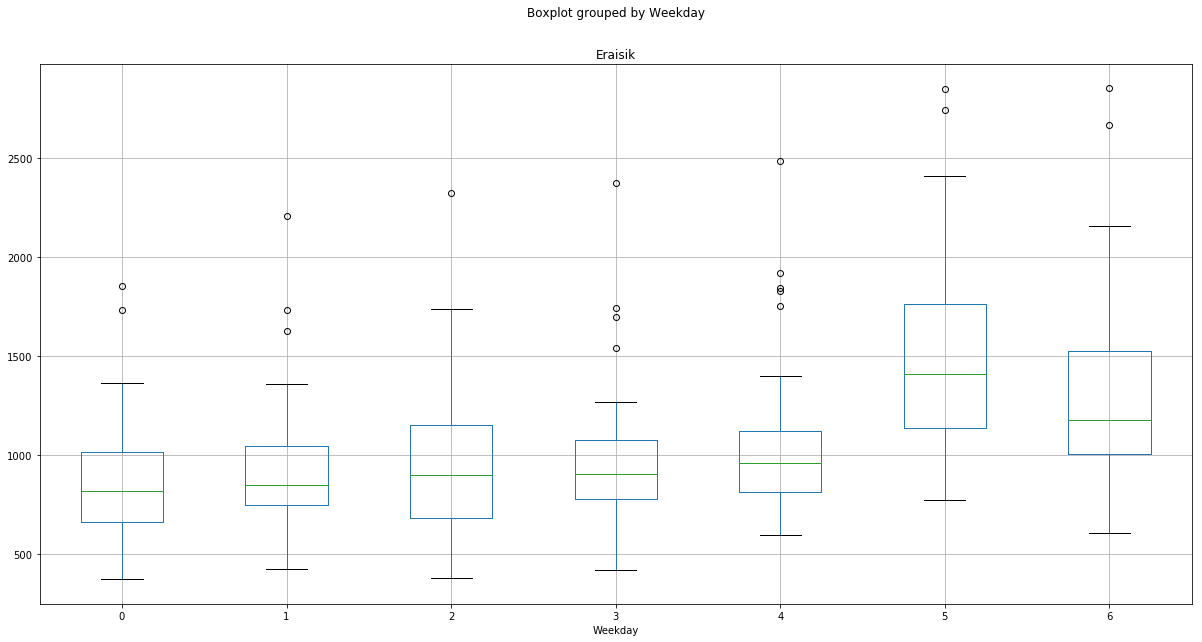

In [112]:
df_pivot_summa['2016'].boxplot(column='Eraisik', by='Weekday',figsize=(20,10))

В магазине Рок-аль-Маре в 2016-ом наибольшие объёмы продаж по субботам и воскресеньям.
Понедельник и четверг - распределение без ассиметрии.
В понедельник, вторник, четверг и пятницу выручку более 1500 евро можно считать выбросом. В субботу и воскресенье - более 2500 евро. Пятница и выходные - выручка меньше 500 евро маловероятна.

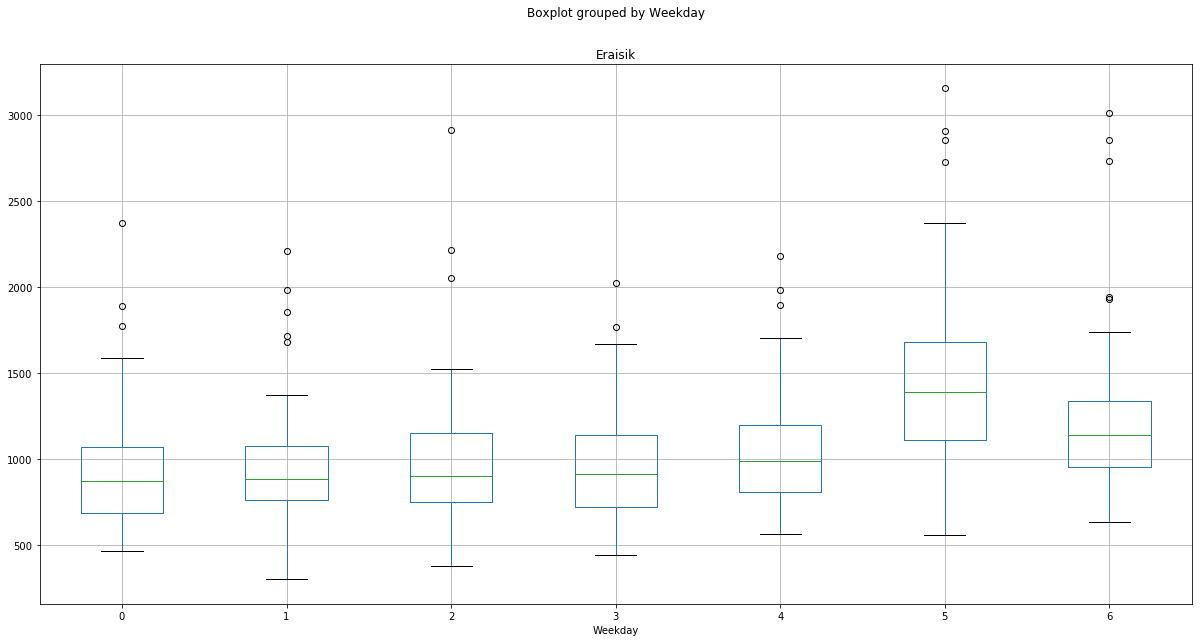

In [113]:
df_pivot_summa['2015'].boxplot(column='Eraisik', by='Weekday',figsize=(20,10))

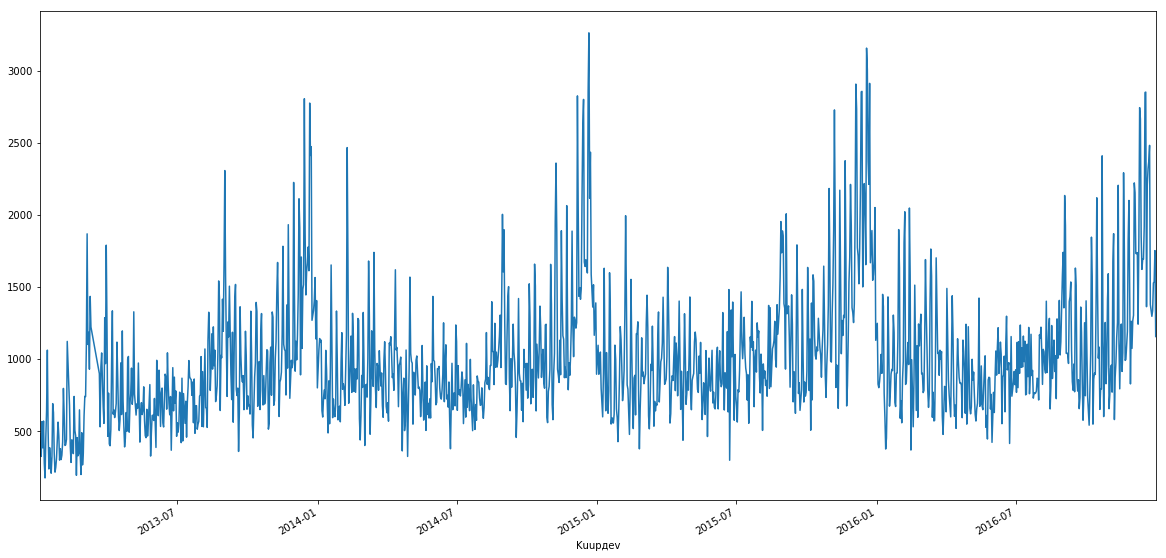

In [114]:
df_pivot_summa['Eraisik']['2013':'2016'].plot(figsize=(20,10))

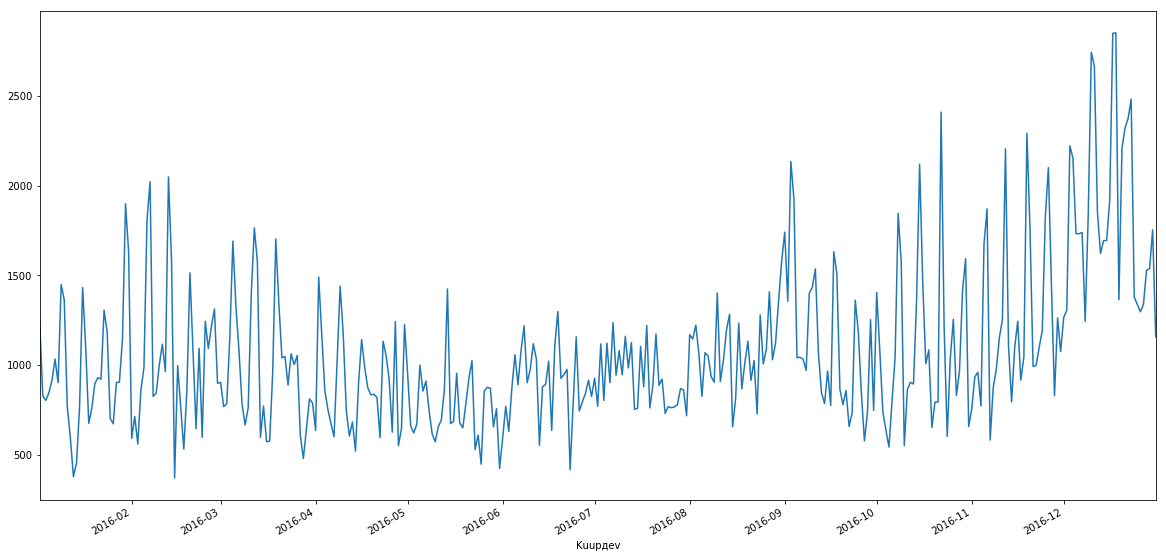

In [115]:
df_pivot_summa['Eraisik']['2016'].plot(figsize=(20,10))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000011858DEF0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000000190784D30>], dtype=object)

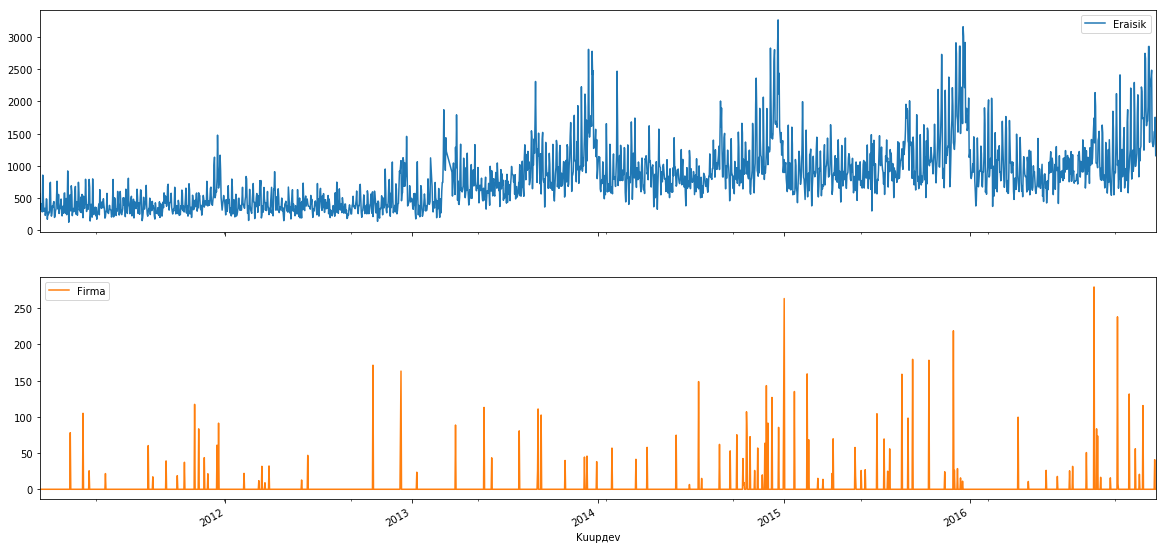

In [117]:
df_pivot_summa[['Eraisik','Firma']].plot(figsize=(20,10), subplots=True)

В Магазине Рок-аль-Маре можно продажи фирмам рассматривать как розничные продажи.

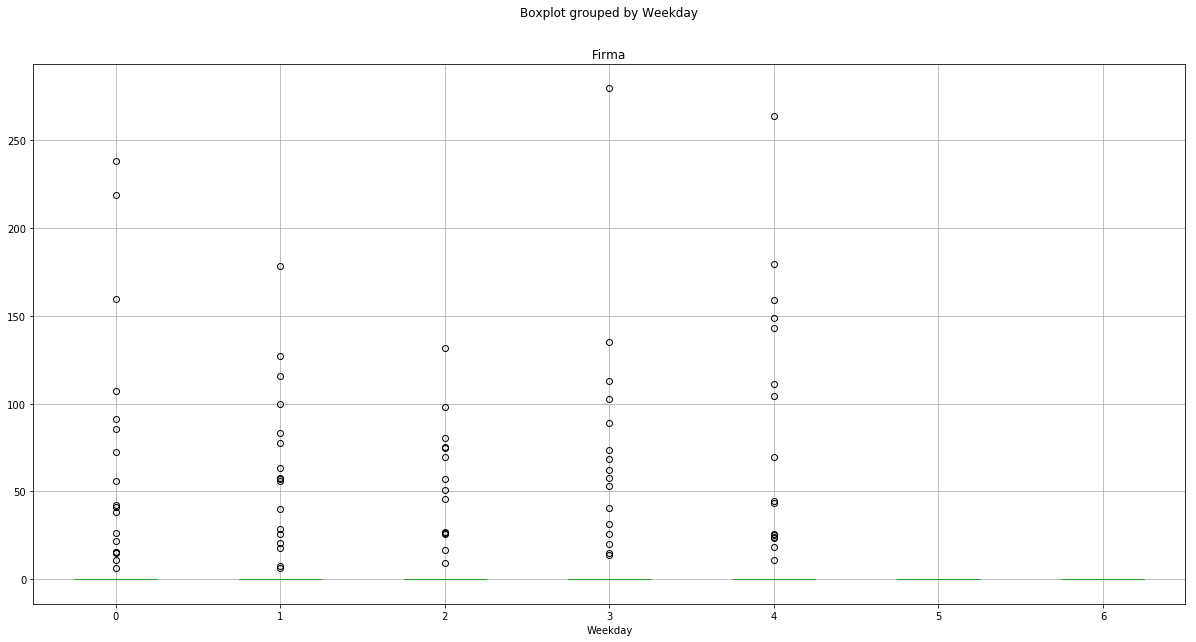

In [123]:
df_pivot_summa['2013':][].boxplot(column='Firma', by='Weekday',figsize=(20,10))

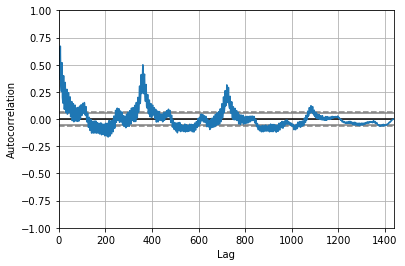

In [120]:
pd.tools.plotting.autocorrelation_plot(df_pivot_summa['Eraisik']['2013':])

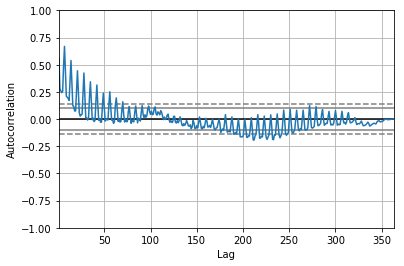

In [121]:
pd.tools.plotting.autocorrelation_plot(df_pivot_summa['Eraisik']['2016'])

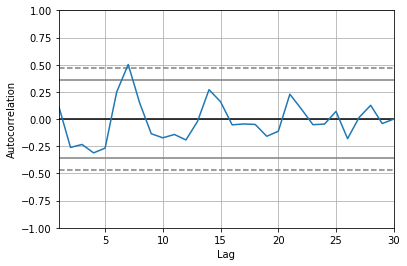

In [122]:
pd.tools.plotting.autocorrelation_plot(df_pivot_summa['Eraisik']['2016-04'])

Очевидные сезонности - годовая, месячная, недельная.